### Initial set-up

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sb
pd.set_option('display.max_columns', None) #all columns are displayed
pd.set_option('display.max_rows', None) #all rows are displayed

In [ ]:
data_white = pd.read_csv("wine_data_white.csv",sep=";")
data_white.head()
data_white['alcohol'] = pd.to_numeric(data_white['alcohol'], errors='coerce')
data_white.describe()
#data_white.shape
null_counts = data_white.isnull().sum()
print(null_counts)

columns = data_white.columns
quality_value = data_white[('quality')]

### Notes: 

We now move to the wine quality dataset. You can import this dataset from the UCI repository here. This dataset is a bit larger, with 4898 samples and 11 features. Instead of predicting the plant variety, the goal here is to predict the quality of the wine based on the features.

- no null values
- ; seperated CSV
- 13 features
- cleaned some alcohol records which where noted in string value instead of numeric

### Data Exploration

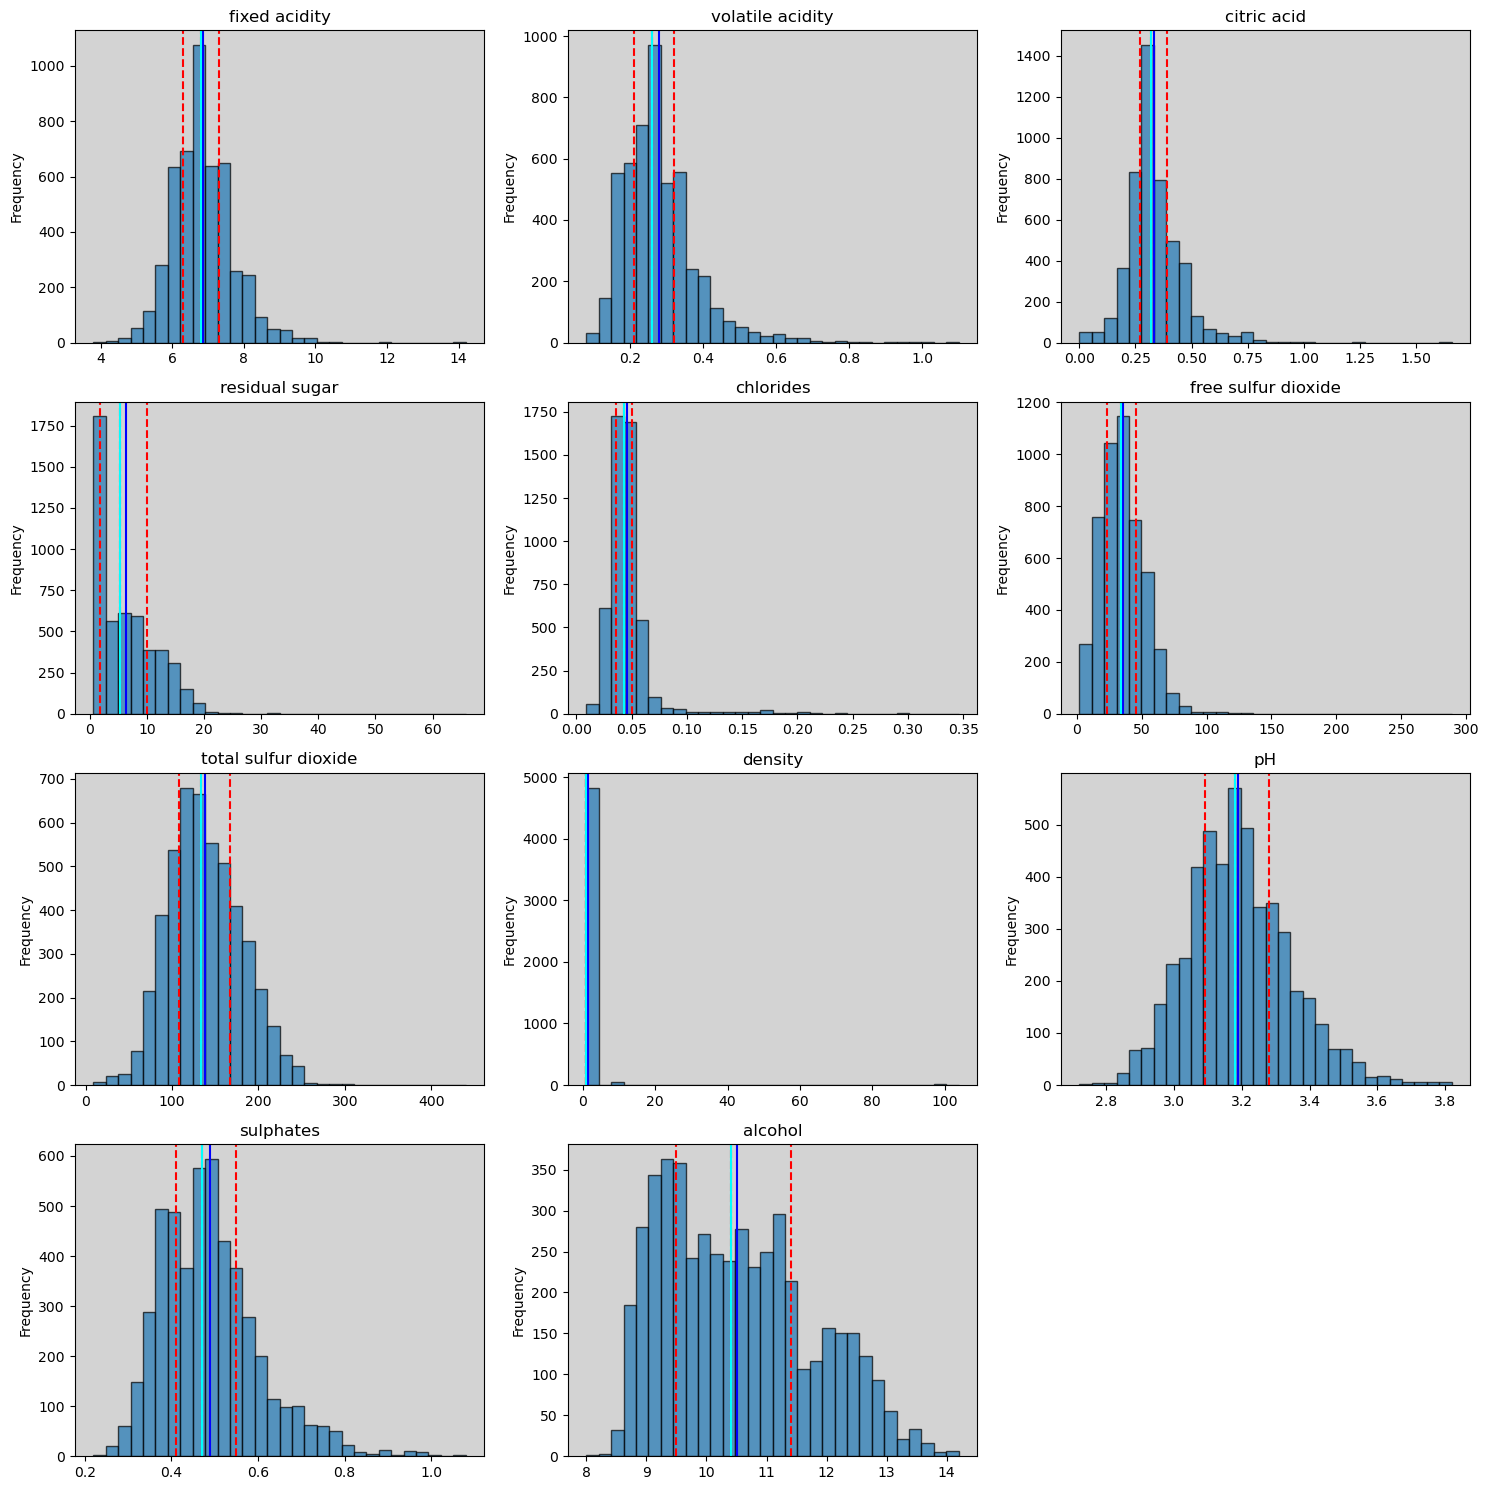

In [62]:
# Create subplots with basic descriptive 
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

columns_to_plot = [col for col in data_white.columns if col != 'quality']

# Plot histograms and set titles
for i, column in enumerate(columns_to_plot):
    axes[i].hist(data_white[column], bins=30, edgecolor='black', alpha=0.7)
    q25 = data_white[column].quantile(0.25)
    q50 = data_white[column].quantile(0.50)
    q75 = data_white[column].quantile(0.75)
    mean = data_white[column].mean()
    median = data_white[column].median()

    #mode = wine_df[column].mode()
    axes[i].set_title(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_facecolor('lightgrey')
    axes[i].axvline(q25, color='Red', linestyle='dashed', linewidth=1.5, label='25th Percentile')
    axes[i].axvline(q50, color='Red', linestyle='dashed', linewidth=1.5, label='50th Percentile')
    axes[i].axvline(q75, color='Red', linestyle='dashed', linewidth=1.5, label='75th Percentile')
    axes[i].axvline(mean, color='Blue', linestyle='solid', linewidth=1.5, label='Mean')
    axes[i].axvline(median, color='Cyan', linestyle='solid', linewidth=1.5, label='Median')
    #axes[i].axvline(mode, color='Green', linestyle='solid', linewidth=1, label='Mode')


for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')


plt.tight_layout()
plt.show()


In [ ]:
columns

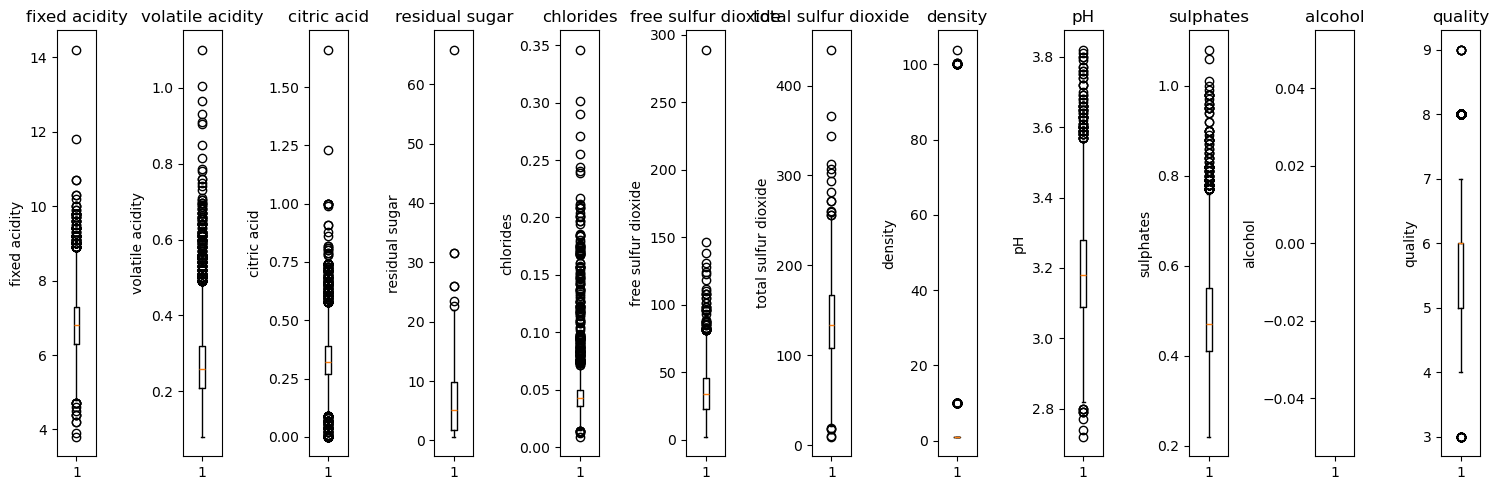

In [61]:

# Select columns to plot
columns_to_plot = [col for col in data_white.columns if col in (columns)]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

# Generate boxplots for each selected column
for ax, col in zip(axes, columns_to_plot):
    ax.boxplot(data_white[col])
    ax.set_title(f'{col}')
    ax.set_ylabel(col)

# Adjust layout
plt.tight_layout()
plt.show()


### Notes: Distribution / Scatter
- density all centers arround 1
- most features are nicely distributed with some being left skewed
- no nice visual for this, since we dont have classes anymore. Could bin and classify a feature to try on the visuals

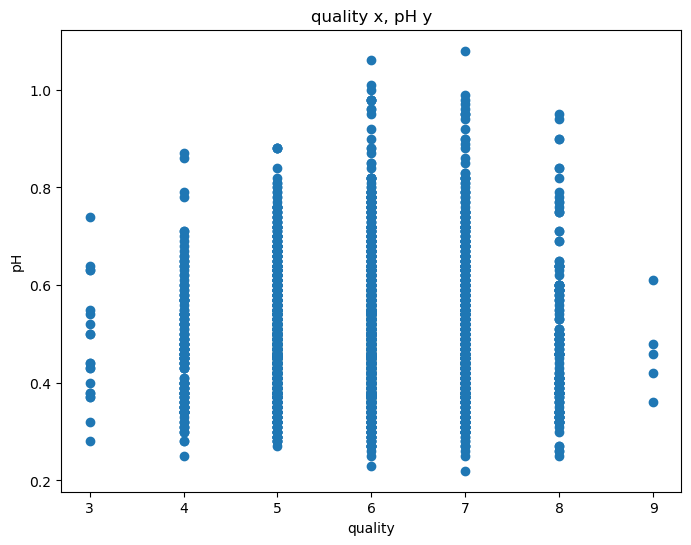

In [63]:
# Plot the data points
#target_classes = data_white['quality'].unique()
#colors = dict(zip(target_classes, ['red', 'Blue',]))
#color_list = data_white['quality'].map(colors)

plt.figure(figsize =(8, 6))
scatter = plt.scatter(
data_white['quality'],
data_white['sulphates'], 
#c=color_list, 
marker='o'
)

# Set axis labels
plt.xlabel('quality')
plt.ylabel('pH')

# Set plot title
plt.title('quality x, pH y')

#handles = [plt.Line2D([], [], marker='o', color=color, linestyle='', label=str(cls)) for cls, color in colors.items()]
#plt.legend(handles=handles, title='Target Classes', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

In [ ]:
corr_matrix = data_white.corr(numeric_only=True)
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435758
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
density                -0.025705
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
Name: quality, dtype: float64

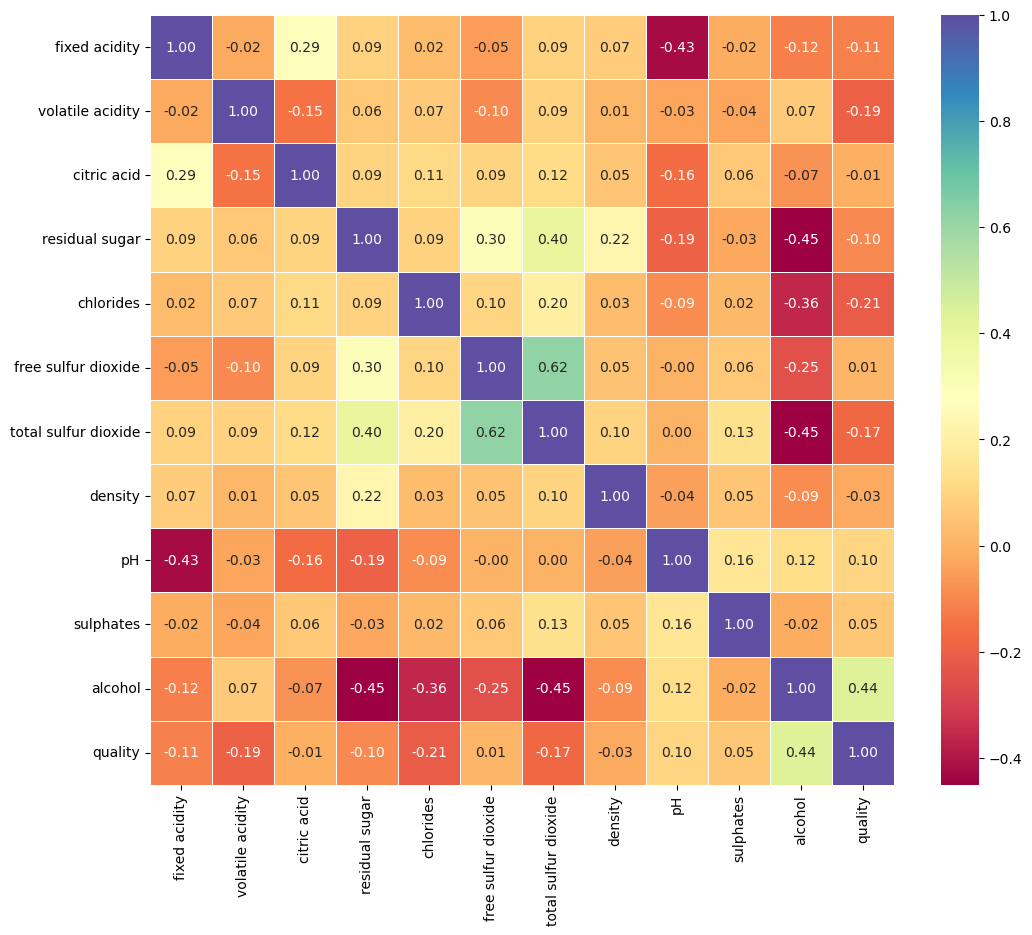

In [65]:
plt.figure(figsize=(12, 10))
hm = sb.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt=".2f", linewidths=0.5)

### Train Test Datasets 

### Feature Scaling

### Model Training (load)

### Cross Validation